# Análisis de los vuelos

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
#from wordcloud import WordCloud

### Carga del archivo pickle

In [3]:
info_vuelos = pd.read_csv('../csv/info_vuelos_final.csv')
#info_vuelos = info_vuelos.drop(columns=['vuelo', 'terminal_salida', 'puerta_salida', 'terminal_llegada', 'puerta_llegada'])
info_vuelos.sample(10)

aerolinea              origen           destino  \
150858          Korean Air          Seúl Incheon      Tokio Narita     
28        Georgian Airways              Tel Aviv            Tiflis     
13198             American           Los Ángeles             Miami     
195968    Tianjin Airlines                 Xi'an           Tianjin     
59170              Avianca                Bogotá              Cali     
193567                 KLM             Rochester           Atlanta     
19010             American        Chicago O'Hare            Wausau     
193576   RwandAir     WB 210         Brazzaville             Duala     
119621               Delta          Orlando Intl           Atlanta     
102748      China Southern               Urumchi           Taskent     

                  fecha_salida horario_salida           fecha_llegada  \
150858    [domingo, 17, marzo]          17:40    [domingo, 17, marzo]   
28          [jueves, 7, marzo]          08:40      [jueves, 7, marzo]   
13198       [sabado, 9, marzo]          17:05    [domingo, 10, marzo]   
195968      [lunes, 18, marzo]          09:15      [lunes, 18, marzo]   
59170      [jueves, 14, marzo]          09:45     [jueves, 14, marzo]   
193567     [sabado, 16, marzo]          17:40     [sabado, 16, marzo]   
19010     [domingo, 10, marzo]          08:19    [domingo, 10, marzo]   
193576  [miercoles, 20, marzo]          21:20  [miercoles, 20, marzo]   
119621    [viernes, 15, marzo]          06:35    [viernes, 15, marzo]   
102748     [jueves, 14, marzo]          09:05     [jueves, 14, marzo]   

       horario_llegada  
150858           20:36  
28               13:10  
13198            19:00  
195968           16:00  
59170            11:05  
193567           19:20  
19010            09:22  
193576           23:40  
119621           07:58  
102748           12:10

In [4]:
info_vuelos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181984 entries, 0 to 181983
Data columns (total 9 columns):
aerolinea               181984 non-null object
origen                  181984 non-null object
destino                 181984 non-null object
hora_salida             181984 non-null object
hora_llegada            181984 non-null object
duracion                181984 non-null int64
precio                  181984 non-null int64
asientos_disponibles    181984 non-null int64
days_flying             181984 non-null bool
dtypes: bool(1), int64(3), object(5)
memory usage: 11.3+ MB


## Top 10: aerolíneas con mayor cantidad de vuelos en marzo

/home/rodrigo/.local/lib/python3.6/site-packages/pandas/plotting/_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


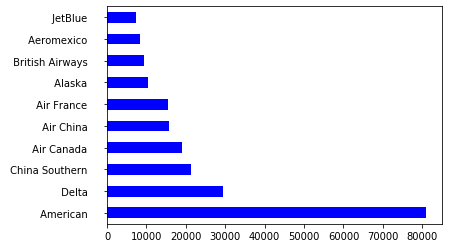

In [5]:
info_vuelos['aerolinea'].value_counts().head(10).plot(kind='barh', colors=['b'])

## Días y horarios de los vuelos

In [5]:
import datetime

def get_dayweek(string_day):
    date_time_obj = datetime.datetime.strptime(string_day, "%Y-%m-%dT%H:%M")
    day_number = date_time_obj.weekday()
    #if(day_number == 0): return 'lunes'
    #if(day_number == 1): return 'martes'
    #if(day_number == 2): return 'miercoles'
    #if(day_number == 3): return 'jueves'
    #if(day_number == 4): return 'viernes'
    #if(day_number == 5): return 'sabado'
    #if(day_number == 6): return 'domingo'
    return day_number
    
def get_hour(string_day):
    date_time_obj = datetime.datetime.strptime(string_day, "%Y-%m-%dT%H:%M")
    return date_time_obj.hour

In [6]:
def complet_heatmap_matrix(values):
    heatmap = np.zeros((24, 7))
    for x in values:
        heatmap[x[1]][x[0]] += 1
    return heatmap
#complet_heatmap_matrix(values)

In [9]:
dias = info_vuelos['fecha_salida'].apply(lambda row: row[0]).tolist()
hora = info_vuelos['horario_salida'].apply(lambda row: row.split(':')[0]).tolist()
d = {'dias': dias, 'hora': hora}
d = pd.DataFrame(data=d)
d = pd.get_dummies(d.dias).groupby(d.hora).apply(sum)
d

,domingo,jueves,lunes,martes,miercoles,sabado,viernes
hora,,,,,,,
00,282,403,167,340,326,232,392
01,241,367,178,269,254,164,266
02,198,322,114,259,259,149,296
03,123,216,66,146,163,107,201
04,149,312,101,196,198,116,273
05,801,1388,386,709,776,673,1206
06,2279,3553,1444,2393,2554,1798,3289
07,2710,4196,1847,3057,3195,2103,3641
08,2848,4462,1850,3158,3305,2147,3653


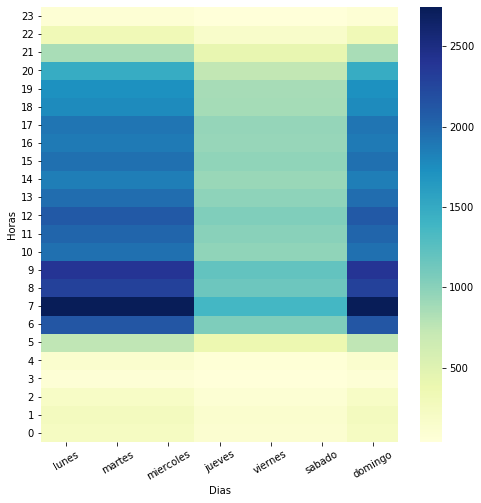

In [40]:
#dias = info_vuelos['fecha_salida'].apply(lambda row: row[0]).tolist()
#hora = info_vuelos['horario_salida'].apply(lambda row: row.split(':')[0]).tolist()
#d = {'dias': dias, 'hora': hora}
#d = pd.DataFrame(data=d)
#d = pd.get_dummies(d.dias).groupby(d.hora).apply(sum)
#d = d[['lunes', 'martes', 'miercoles', 'jueves', 'viernes', 'sabado', 'domingo']]
values = info_vuelos['hora_salida'].apply(lambda row: (get_dayweek(row), get_hour(row))).tolist()
fig, ax = plt.subplots(figsize=(8, 8))
ax = sns.heatmap(complet_heatmap_matrix(values), cmap="YlGnBu", yticklabels=True)
ax.invert_yaxis()
ax.set(xlabel='Dias', ylabel='Horas')
ax.set_xticklabels(['lunes', 'martes', 'miercoles', 'jueves', 'viernes', 'sabado', 'domingo'], rotation=30)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.show()

## Destinos más frecuentes

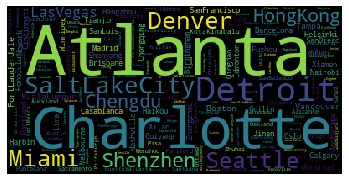

In [20]:
d = info_vuelos['destino'].apply(lambda destino: destino.replace(" ", "")).tolist()
text = " ".join(d)
wordcloud = WordCloud().generate(text)
wordcloud = WordCloud(background_color="black", collocations=False).generate(text)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## GeoMapas

In [2]:
import geopandas as gpd

In [3]:
from shapely.geometry import Point, Polygon

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
airports_map = gpd.read_file('airports_shape/TM_WORLD_BORDERS-0.3.shp')

ImportError: The descartes package is required for plotting polygons in geopandas.

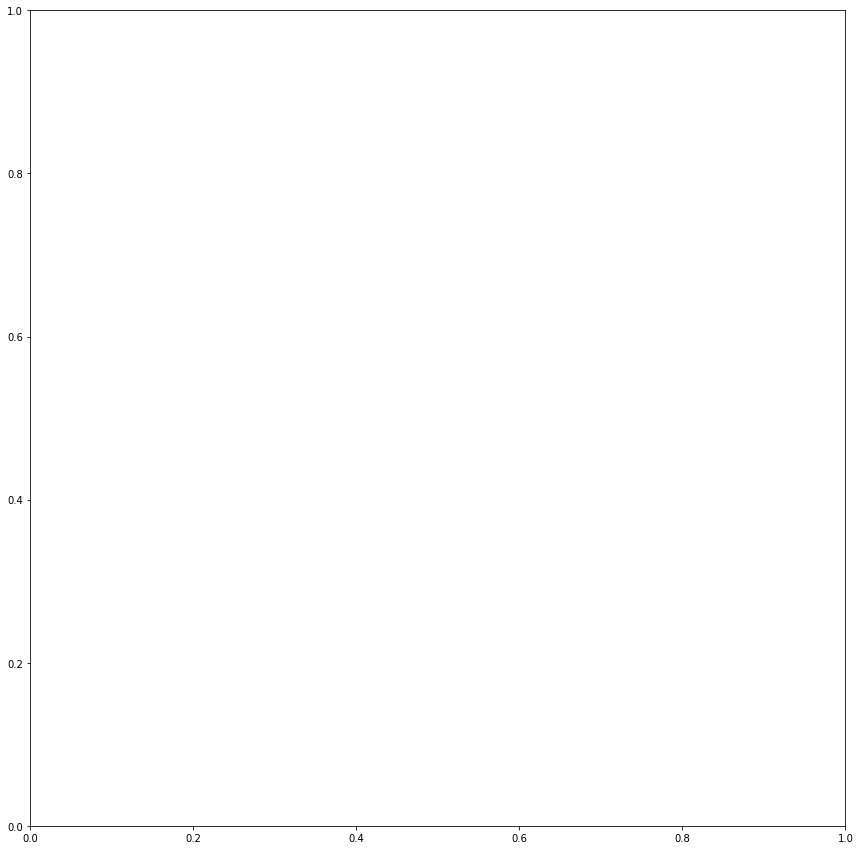

In [10]:
fig, ax = plt.subplots(figsize=(15,15))
airports_map.plot(ax = ax)